Before you turn this homework in, make sure everything runs as expected. First, **restart the kernel** and then **run all cells** (in the menubar, select Kernel$\rightarrow$Restart \& Run all). If you get error messages, the grader will get the same errors and won't be able to grade your work. 

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". You may delete the line(s) that say "**raise** NotImplementedError()" and replace them with your actual work. Write all your work in the cells provided in this notebook. **DO NOT** add or delete any cells. 

Please fill in your name in the cell below.

In [1]:
NAME = "Kevin Pham"

---

# Homework 8

In all problems below, please comment your code sufficiently well so that the grader can follow what you are doing with ease. For non-coding answers, please make sure to formulate your explanation and answers in the form of complete English sentences. It is not sufficient to just leave comments in the code (without full sentence explanations in problems that ask for those) or vice versa (to leave full sentence explanations but not code comments). You will need both to get full credit. 

## Problem 1

We're continuing to practice data wrangling with Pandas. The dataset we'll consider for this problem is a CDC dataset on COVID-19 rates of hospitalization and deaths by age group and vaccination status. The data can be downloaded from [the CDC website](https://data.cdc.gov/Public-Health-Surveillance/Rates-of-COVID-19-Cases-or-Deaths-by-Age-Group-and/3rge-nu2a/data). Please download the dataset directly from the CDC website (click on the Export button (see image on Canvas) and choose the "csv for Excel" option. Do not make any changes to the csv file before importing it into Pandas. 

**Note:** Some of the "strange behavior" the problem below is talking about is platform specific. It may occur on some platforms (MacOS, Windows, Linux) but not others. If you don't see strange behavior in the file you downloaded from the CDC, check out the csv file from Canvas. 

The variables in this dataset are:
* outcome (case or death)
* month
* MMWR week (epidemiological weeks of the year, ranging from Sunday to Saturday)
* Age group
* Vaccine product
* Vaccinated with outcome (means fully vaccinated 
with one full series of shots)
* Fully vaccinated population 
* Unvaccinated (partially vaccinated people are not included in this data set)
* Unvaccinated population 
* Crude vax IR (incidence rates: ratio of vaccinated case/vaccinated population)*100k
* Crude unvax IR (incidence rates: ratio of unvaccinated case/unvaccinated population)*100k
* Crude IRR (incidence rate ratio: ratio of crude vax IR/Crude unvax IR)
* Age adjusted vax IR (there are not equally many people in all the age groups. When age groups are combined, the IR is a weighted average of the groups)
* Age adjusted unvax IR (see above)
* Age adjusted IRR (see above)
* Continuity correction (fineprint from the CDC website says: "Continuity correction: A continuity correction has been applied to the denominators by capping the percent population coverage at 95%. To do this, we assumed that at least 5% of each age group would always be unvaccinated in each jurisdiction. Adding this correction ensures that there is always a reasonable denominator for the unvaccinated population that would prevent incidence and death rates from growing unrealistically large due to potential overestimates of vaccination coverage.")

This is a true data wrangling problem. The purpose of this exercise is to illustrate what frequently happens when you work with data downloaded in some format (here csv) from some reputable source. In your real jobs, you would have to identify all the issues yourself (which is usually the most time consuming part). When working with these data, one would like to probably graph COVID-19 rates as a function of time, vaccine status, age-group etc. 

(a) Import the csv file into Pandas as a Data Frame named 'data'. What is the current data type of the column 'Crude vax IR'? We would like the entries in this column to be numeric. Convert them to floats. 

Hint: There is something that currently prevents you from just converting them to numeric with the command ```pd.to_numeric()```. Find out what that is. Describe the issue in the markdown box below and fix it. 

In [2]:
# COMPLETE?
# YOUR CODE HERE
import pandas as pd
import numpy as np

# retrieve the data first
data = pd.read_csv("Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status.csv")

data['Crude vax IR'] = [i.replace(',', '') for i in data['Crude vax IR'].values] # the problem is the ',' that it cannot convert
#data['Crude vax IR'] = pd.to_numeric(data['Crude vax IR']) # now the conversion should be possible.

# retrieve dtype of column 'Crude vax IR'.
print(data['Crude vax IR'].values.dtype)


# raise NotImplementedError()

# uncomment this line when you're done so that the grader can see the result of your conversion
data['Crude vax IR'].values.dtype
#data

float64


dtype('float64')

There is a "," that is in the cells that prevents it from being converted into a 'float' type value.

(b) Write Pandas code to create a new column 'Time' in format yyyy/mm. You can get the year information out of the `MMWR week` column and the month out of the 'month' column. Please pad the months (04 instead of 4) so that the times in yyyy/mm format can be ordered meaningfully. Display your modified data frame so that the grader can see it. Put your new 'Time' column on the left so that the grader can see it without scrolling.

**Example:** If month is `4-Apr` and MMWR week is 202114, then `Time` should be 2021/04.

In [3]:
# COMPLETE
# YOUR CODE HERE

# recall: n = 1591 samples
# seems like only the first 4 digits and last digit will be relevant
# dont forget to account for months 10,11,12
date = [] # empty list for each converted date
month_dict = {"JAN":"01", "FEB":"02", "MAR":"03", "APR":"04", "MAY":"05", "JUN":"06", "JUL":"07", "AUG":"08","SEP":"09","OCT":"10","NOV":"11","DEC":"12"}

for i,j in enumerate(data['month']):
       date.append(str(data['MMWR week'][i])[:4]+"/"+month_dict[j[:3]]) # one string appended per date
        # the above first retrieves the year by extracting the first 4 digits from the entry from 'MMWR week'
        # then, extracts the first 3 letters from 'month' that links to a value in a predeclared dictionary that
        # corresponds to each month of the year.

# create the new column
data['Time'] = date


# check it by placing it on the left
order = ['Time'] + list(data.columns[:len(data.columns)-1]) # first reorder it

display(data[order]) # display it

    
#raise NotImplementedError()

,Time,outcome,month,MMWR week,Age group,Vaccine product,Vaccinated with outcome,Fully vaccinated population,Unvaccinated with outcome,Unvaccinated population,Crude vax IR,Crude unvax IR,Crude IRR,Age adjusted vax IR,Age adjusted unvax IR,Age adjusted IRR,Continuity correction
0,2021/04,case,APR 2021,202114,12-17,all_types,8,3.688700e+04,30785,17556462.00,21.687858,175.348541,8.085102,NaN,NaN,NaN,0
1,2021/04,case,APR 2021,202114,18-29,all_types,674,2.543093e+06,76736,31091322.00,26.503160,246.808418,9.312415,NaN,NaN,NaN,0
2,2021/04,case,APR 2021,202114,30-49,all_types,1847,7.428405e+06,98436,41074337.00,24.864019,239.653290,9.638558,NaN,NaN,NaN,0
3,2021/04,case,APR 2021,202114,50-64,all_types,1558,7.487444e+06,50324,22948569.00,20.808169,219.290362,10.538667,NaN,NaN,NaN,0
4,2021/04,case,APR 2021,202114,65-79,all_types,1672,1.439810e+07,14880,7675907.00,11.612644,193.853313,16.693297,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,2022/08,death,AUG 2022,202235,80+,all_types,328,7.078966e+06,172,963095.40,4.633445,17.859082,3.854385,NaN,NaN,NaN,1
1587,2022/08,death,AUG 2022,202235,all_ages_adj,all_types,603,1.428525e+08,398,50965568.85,0.422114,0.780919,1.850021,0.287258,1.605239,5.588152,1
1588,2022/08,death,AUG 2022,202235,all_ages_adj,Janssen,33,1.075017e+07,398,50965568.85,0.306972,0.780919,2.543944,0.317448,1.605239,5.056694,1
1589,2022/08,death,AUG 2022,202235,all_ages_adj,Moderna,286,4.941886e+07,398,50965568.85,0.578726,0.780919,1.349376,0.294841,1.605239,5.444415,1


(c) What are the current levels (i.e., possible values) of the variable 'Age group'? Speculate on how the strange values may have arisen. Fix the issue in Pandas. With the exception of the '80+' and the 'all_ages_adj' categories, all other categories should be of the form 'n-m', where both n and m are integers. 

In [4]:
# COMPLETE
# YOUR CODE HERE
print(set(data['Age group'])) # all possible age groups.

# LOOK AT THE ACTUAL EXCEL SHEET
# "12-17" autoconverts to "DEC-17" and "05-11" to "MAY-11" in excel, this could be problematic
data['Age group'].replace('17-Dec', '12-17', inplace = True) # Fix the age range '12-17'
data['Age group'].replace('11-May', '5-11', inplace = True) # fix the age range '05-11'


# raise NotImplementedError()

{'12-17', '5-11', '65-79', '80+', '50-64', '30-49', 'all_ages_adj', '18-29'}


"05-11" and "12-17" automatically converted into the following dates "MAY-11" and "DEC-17" respectively.

## Problem 2

We will continue to practice investigating a data set through visualizations. You can download "Avocado_2019-21.csv" from Canvas. This data set contains information on weekly Hass Avocado sales in the US in 2019-2021. The data comes from the [Hass Avocado Board](https://hassavocadoboard.com/) website. The variables in the file are 

* ```Geography``` - The area of the observation
* ```Geography_type``` - The type of the area (city, region, country). 
* ```Timeframe``` - all weeekly 
* ```Current Year Week Ending``` - the week the observations were collected from
* ```Type``` - conventional or organic
* ```ASP Current``` - the current average sales price of a single avocado
* ```Total Bulk and Bags Units``` - Total sales volume
* ```4046 Units``` - Total number of avocados with PLU 4046 sold (small Hass Avocado)
* ```4225 Units``` - Total number of avocados with PLU 4225 sold (medium Hass Avocado)
* ```4770 Units``` - Total number of avocados with PLU 4770 sold (large Hass Avocado)
* ```Total Bagged Units``` - Total number of avocados sold in bags
* ```SmlBagged Units```, ```LrgBagged Units```, ```X-LrgBagged Units``` is number of bags sold in different sizes
* ```Bulk GTIN``` is produce sold in bulk to institutions such as restaurants


Your job: Take these data and create four meaningful graphs. It is a good idea to subset the data and consider only a subset for each problem part. Each graph should be sufficiently well labeled so that a reader can understand what your graph shows without reading any additional explanations. In addition to each graph, write a short paragraph (a few sentences per graph) that explain what your graph shows and that interpret for the viewer what can be seen in your graph. For example, if you are drawing a graph to compare two populations, you should state whether there are any differences between the populations and if so, describe what these differences are.

Note, that the rows in the data set correspond to geographical regions of the US. The regions are not mutually exclusive. For instance, you can find "San Francisco", "California", "West", and "Total US". Since "San Francisco" is part of "California" which is part of the "West" which is part of the "Total US", it would **not** make sense to average values from those rows. 

(a) Investigate the distribution of a *single* variable in the data set. 

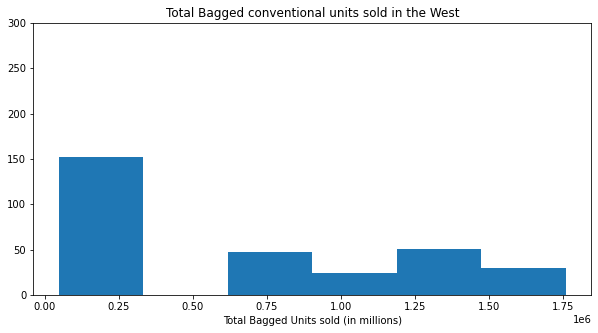

In [5]:
# INCOMPLETE
# YOUR CODE HERE
import matplotlib as mp
import matplotlib.pyplot as plt

# retrieve the data
avo_data = pd.read_csv("Avocado_2019-21.csv")


# set up the plot
fig = plt.figure(figsize = (10,5)) # establish figure
ax = plt.axes()



# set up observable data
# adjust for subsetted regions
# goal: Let's investigate 'Totalbagged Units' in the Region 'West' that have been sold.
price_df = avo_data[(avo_data['Geography_type'] == 'Region')&(avo_data['Geography'] == 'West')]['TotalBagged Units']


# plot it
ax.hist(price_df, bins = 6, align = 'mid'); 


# graph cosmetics

ax.set_ylim(0,300); # set the ylimits
ax.set_xlabel("Total Bagged Units sold (in millions)") # set x-axis label
ax.set_title("Total Bagged conventional units sold in the West"); # add a title




# raise NotImplementedError()

It seems that the most popular quantity in terms of the 'conventional total bagged units amongst the country' is between 500-600k and between 900-1000k.

(b) Investigate the relationship between *exactly two* variables in the data set. 

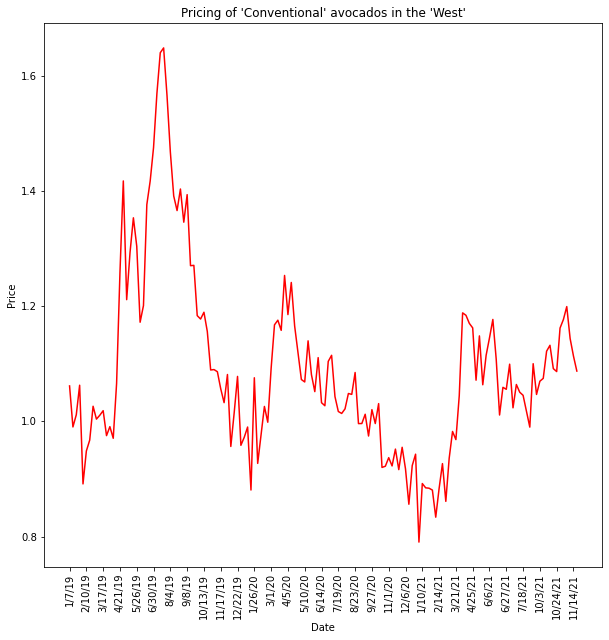

In [6]:
# COMPLETE
# YOUR CODE HERE

# let's look into the relationship between pricing of CONVENTIONAL avocados in the WEST over time using a LINE GRAPH

# subset the relevant data
west_price = avo_data[(avo_data['Geography'] == 'West')&(avo_data['Type']=='Conventional')]

# grab the timeframe, only the DATES matter (horizontal axis components)
timeline = west_price['Current Year Week Ending']
# the space between mm/dd/yyyy and clock time will make using .split() useful to grab just the date itself without the clock time
timeline = [time.split()[0] for time in list(timeline.values)] # list comprehension


# grab the pricing of the avocados i.e. 'ASP Current Year'
price = west_price['ASP Current Year']

# predetermine the length of the horizontal axis
x_size = len(timeline)


# establish the plot with a predetermined figure size
fig = plt.figure(figsize = (10,10)) 
ax = plt.axes()

# plot it
ax.plot(timeline,price,label = timeline, color = 'red')

# graph cosmetics
ax.set_xticks(range(x_size)[::5],timeline[::5],rotation = 90); # adjust proper xticks with their labels
ax.set_title("Pricing of 'Conventional' avocados in the 'West'"); # add a title
ax.set_ylabel("Price"); # adjust y-axis label
ax.set_xlabel("Date"); # adjust x-axis label





# raise NotImplementedError()

Upon inspection on the plot, it can be seen that the year 2019 achieved the absolute highest price for conventional avocados in the west, but as 2020 started and progressed, there is a noticeable decline in the pricing per month. 2021 would show a pricing increase as the year progressed.

(c) Investigate the relationship between *exactly three* variables in the data set in a single graph. 

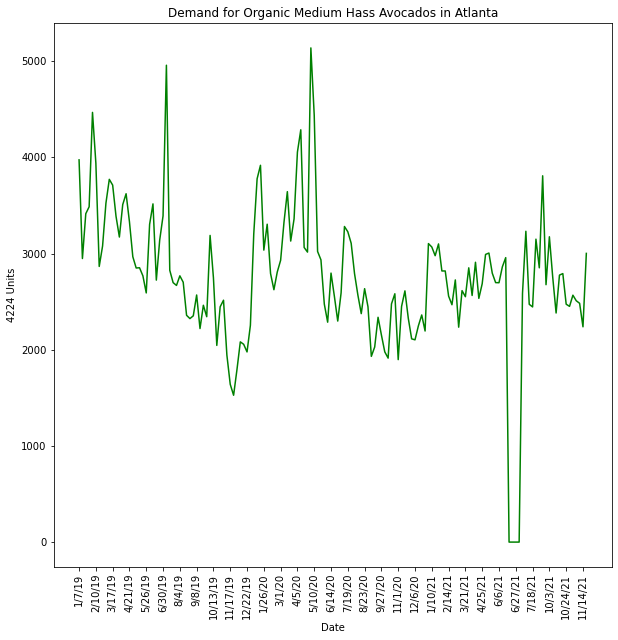

In [7]:
# COMPLETE
# YOUR CODE HERE
# 3 vars: Investigating ORGANIC MEDIUM HASS AVOCADO (PLU 4225) demand specifically for city 'Atlanta'

# retrieve relevant data: 'Atlanta', 'Organic', '4225 Units'
var_3 = avo_data[(avo_data['Geography_type'] == 'City')&(avo_data['Geography']=='Atlanta')&(avo_data['Type']=='Organic')]['4225 Units']

# establish plot
fig = plt.figure(figsize = (10,10));
ax = plt.axes() # establish axes


# add axes info
x_size = len(timeline) # length for the horizontal axis, recycling from (b)


# plot it
ax.plot(timeline,var_3,label = timeline,color = 'green');





# graph cosmetics
ax.set_title("Demand for Organic Medium Hass Avocados in Atlanta"); # add a title
ax.set_xticks(range(x_size)[::5],timeline[::5],rotation = 90); # adjust xtick dates to show progression
ax.set_ylabel("4224 Units");
ax.set_xlabel("Date");


# raise NotImplementedError()

Inspecting the demand plot, we can see a sharp decline of the demand midway through 2021, but reverting back in the subsequent month. We can also note the absolute max of the demand midway through 2020. We also see the most fluctuation throughout the entirety of 2019 up until mid-2020.

(d) Investigate the relationship between *exactly four* variables in the data set using a panel plot.

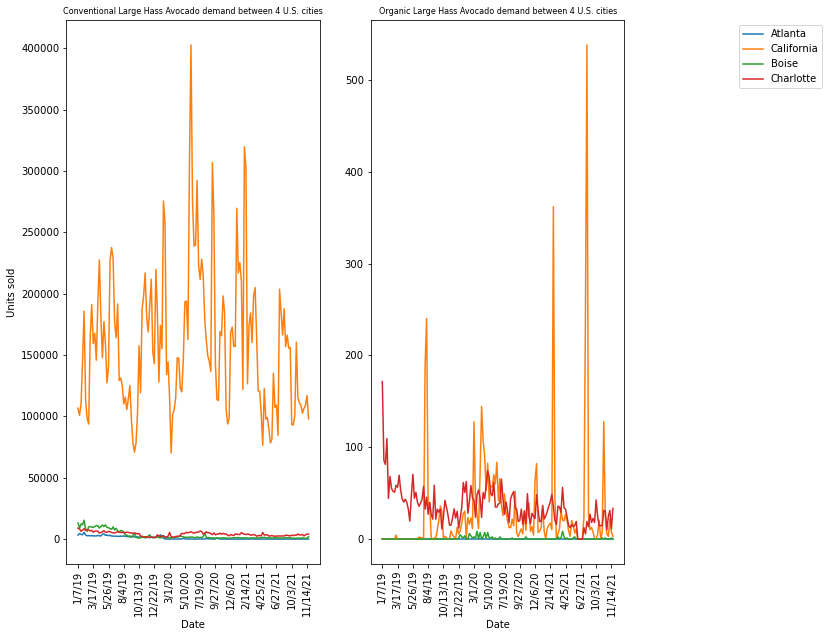

In [8]:
# COMPLETE

# YOUR CODE HERE
# Investigate Conventional v. Organic LARGE HASS AVOCADOS popularity based on 4 different cities over time.

# retrieve 4 different cities.
atlanta = avo_data[avo_data['Geography'] == 'Atlanta'] # all of 'atlanta' data 
cali = avo_data[avo_data['Geography'] == 'California'] # all of 'california' data
boise = avo_data[avo_data['Geography'] == 'Boise'] # all of 'boise' data
charlotte = avo_data[avo_data['Geography'] == 'Charlotte'] # all of 'charlotte' data

# differentiate by 'type' of avocado
atlanta_con = atlanta[atlanta['Type'] == 'Conventional'] # conventional in atlanta
atlanta_org = atlanta[atlanta['Type'] == 'Organic'] # organic in atlanta

cali_con = cali[cali['Type'] == 'Conventional'] # conventional in california
cali_org = cali[cali['Type'] == 'Organic'] # organic in california

boise_con = boise[boise['Type'] == 'Conventional'] # conventional in boise
boise_org = boise[boise['Type'] == 'Organic'] # organic in boise

char_con = charlotte[charlotte['Type'] == 'Conventional'] # conventional in charlotte
char_org = charlotte[charlotte['Type'] == 'Organic'] # organic in charlotte


# add axes info
x_size = len(timeline) # length for the horizontal axis, recycling from (b)
x_lab = ['Atlanta','California','Boise','Charlotte'] # for legend
# establish PANEL PLOTS
fig, ax = plt.subplots(1,2, figsize = (10,10)) # 1 row of panels with 2 panels on that row.

# plot conventional first
ax[0].plot(timeline,atlanta_con['4770 Units'], label = x_lab[0]);
ax[0].plot(timeline,cali_con['4770 Units'],label=x_lab[1]);
ax[0].plot(timeline,boise_con['4770 Units'],label = x_lab[2]);
ax[0].plot(timeline,char_con['4770 Units'], label = x_lab[3]);

# plot organic now second
ax[1].plot(timeline,atlanta_org['4770 Units'],label = x_lab[0]);
ax[1].plot(timeline,cali_org['4770 Units'],label=x_lab[1]);
ax[1].plot(timeline,boise_org['4770 Units'],label = x_lab[2]);
ax[1].plot(timeline,char_org['4770 Units'],label=x_lab[3]);

# graph cosmetics
ax[0].set_title("Conventional Large Hass Avocado demand between 4 U.S. cities", fontsize = 8); # add a title for each
ax[1].set_title("Organic Large Hass Avocado demand between 4 U.S. cities", fontsize = 8);

ax[0].set_xticks(range(x_size)[::10],timeline[::10],rotation = 90); # set the xticks
ax[1].set_xticks(range(x_size)[::10],timeline[::10],rotation = 90);

ax[0].set_ylabel("Units sold"); # vertical axis label
ax[0].set_xlabel("Date"); # horizontal axis label
ax[1].set_xlabel("Date");

ax[1].legend(bbox_to_anchor=(1.8, 1.)); # add a legend outside of the graphs


# raise NotImplementedError()

Observing the two subplots, it can be seen that California is dominant when it comes to the purchase of 'Large Hass Avocados' of either type. It is the most pronounced under the entirety of the conventional graph and some portions of the organic graph, which could be attributed to the dependency of the season it was purchased in. While hard to examine, especially in the organic graph, Atlanta purchases the least of both types of large hass avocados.

**Note:** There are many possible solutions for this problem. You don't have to show the same graphs you'll see in the solution to obtain full credit. Here are the criteria that we will be grading on:

* did you pick non-trivial variable(s) to display (e.g., the distributions of "year" or "date" by themselves are not interesting)?
* do your graphs show exactly one, two, three or four variables as requested? 
* is your graph labeled sufficiently well so that it's easy to understand what one is looking at? 
* does the type of your graph make sense for the variable(s) you chose to display? (e.g., a bar graph of "Year" as a function of "Region" would not make any sense). 
* does your explanation make sense and fit the graph you created?